<a href="https://colab.research.google.com/github/nuyhc/RhythmStudy/blob/main/1.%20PyTorch/Part_2_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab-08-1 Perceptron

## 학습목표

퍼셉트론(Perceptron) 에 대해 알아본다.

## 핵심키워드

퍼셉트론(Perceptron)  
선형분류기(Linear Classifier)  
AND, OR, XOR 게이트

## xor



In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device='cuda')
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device='cuda')

In [15]:
## nn Layers
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid).to(device='cuda')

# define cost/Loss & optimizer
criterion = torch.nn.BCELoss().to(device='cuda')
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(1001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/Loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7230391502380371
100 0.6931487321853638
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996


# Lab-08-2 Multi Layer Perceptron

## 학습목표

다중 퍼셉트론(Multi Layer Perceptron) 에 대해 알아본다.

## 핵심키워드

다중 퍼셉트론(Multi Layer Perceptron)  
오차역전파(Backpropagation)

### Code: xor-nn

In [17]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device='cuda')
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device='cuda')

## nn Layers
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device='cuda')

# define cost/Loss & optimizer
criterion = torch.nn.BCELoss().to(device='cuda')
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/Loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7338801622390747
100 0.6928917765617371
200 0.6912330985069275
300 0.6784845590591431
400 0.5687922239303589
500 0.2282067984342575
600 0.08418618142604828
700 0.047745853662490845
800 0.03272126615047455
900 0.024714533239603043
1000 0.019786899909377098
1100 0.016464838758111
1200 0.014080371707677841
1300 0.012288849800825119
1400 0.010895347222685814
1500 0.009781388565897942
1600 0.00887119211256504
1700 0.00811384990811348
1800 0.0074741411954164505
1900 0.006926767993718386
2000 0.006453270558267832
2100 0.006039668805897236
2200 0.005675318650901318
2300 0.00535199698060751
2400 0.005063191521912813
2500 0.0048036593943834305
2600 0.004569170530885458
2700 0.004356323275715113
2800 0.004162274766713381
2900 0.00398459006100893
3000 0.003821388818323612
3100 0.003670870093628764
3200 0.003531681140884757
3300 0.0034025763161480427
3400 0.003282519755885005
3500 0.0031705512665212154
3600 0.003065950470045209
3700 0.002967997221276164
3800 0.0028760323766618967
3900 0.0027895

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# nn layers
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)

# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    predicted = (model(X) > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())

### Code: xor-nn-wide-deep

In [19]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device='cuda')
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device='cuda')

## nn Layers
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device='cuda')

# define cost/Loss & optimizer
criterion = torch.nn.BCELoss().to(device='cuda')
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/Loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.8044341802597046
100 0.6931476593017578
200 0.6931474208831787
300 0.6931473016738892
400 0.6931471824645996
500 0.6931470632553101
600 0.6931468844413757
700 0.6931467056274414
800 0.6931466460227966
900 0.6931464672088623
1000 0.6931463479995728
1100 0.6931462287902832
1200 0.6931461095809937
1300 0.6931459903717041
1400 0.6931458711624146
1500 0.6931456327438354
1600 0.6931455731391907
1700 0.6931454539299011
1800 0.6931452751159668
1900 0.693145215511322
2000 0.6931450366973877
2100 0.6931447982788086
2200 0.6931447982788086
2300 0.6931445598602295
2400 0.6931444406509399
2500 0.6931443214416504
2600 0.6931440830230713
2700 0.6931439638137817
2800 0.6931437849998474
2900 0.6931436061859131
3000 0.6931434869766235
3100 0.6931432485580444
3200 0.6931431293487549
3300 0.6931429505348206
3400 0.6931427121162415
3500 0.6931425333023071
3600 0.693142294883728
3700 0.6931421756744385
3800 0.6931419372558594
3900 0.6931416988372803
4000 0.6931414604187012
4100 0.6931412220001221
4200 0

# Lab-09-1 ReLU

## 학습목표

ReLU 활성화 함수에 대해 알아본다.

## 핵심키워드

ReLU  
Sigmoid  
Optimizer

## ReLU

$f(x) = max(0, x)$

```python
x = torch.nn.sigmoid(x)
x = torch.nn.relu(x)
```

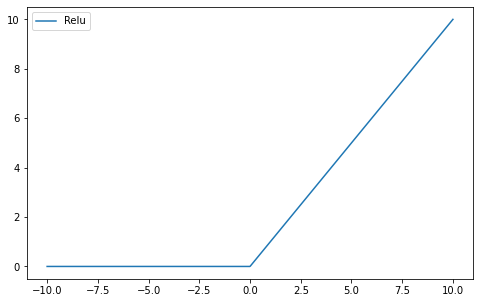

In [23]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(8, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()

## Optimizer in PyTorch

* torch.optim.SGD
* torch.optim.Adadelta
* torch.optim.Adagrad
* torch.optim.Adam
* torch.optim.SparseAdam
* torch.optim.Adamax
* torch.optim.ASGD
* torch.optim.LBFGS
* torch.optim.RMSprop
* torch.optim.Rprop

### Code: mnist_softmax

In [24]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [27]:
# parameters
learning_rate = 1e-3
training_epochs = 15
batch_size = 100

In [28]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [29]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [30]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [31]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

In [32]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.614322782
Epoch: 0002 cost = 0.344514906
Epoch: 0003 cost = 0.308487236
Epoch: 0004 cost = 0.291329682
Epoch: 0005 cost = 0.281550318
Epoch: 0006 cost = 0.274611473
Epoch: 0007 cost = 0.269422829
Epoch: 0008 cost = 0.264997125
Epoch: 0009 cost = 0.261648208
Epoch: 0010 cost = 0.259036928
Epoch: 0011 cost = 0.256706297
Epoch: 0012 cost = 0.254275411
Epoch: 0013 cost = 0.252618015
Epoch: 0014 cost = 0.251062483
Epoch: 0015 cost = 0.249662459
Learning finished


In [37]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9071999788284302
Label:  9
Prediction:  9


### Code: mnist_nn

In [ ]:
# parameters
learning_rate = 1e-3
training_epochs = 15
batch_size = 100

In [38]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [42]:
# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[ 0.1009, -0.2272, -0.1022,  ...,  0.0922,  1.1218, -2.3234],
        [-0.3704, -0.8331, -1.1891,  ..., -1.7013, -0.5046,  0.0042],
        [ 0.9456,  1.2369,  2.4942,  ..., -1.3929, -0.1838,  0.2116],
        ...,
        [-0.3243, -0.9582, -0.7711,  ..., -1.1196, -1.5940, -1.9989],
        [-0.3863,  0.7890, -1.7299,  ..., -0.5695, -1.6629, -1.7940],
        [ 0.0340, -1.7568,  1.6520,  ...,  1.0737, -2.2457, -1.7699]],
       device='cuda:0', requires_grad=True)

In [39]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [40]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [41]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.302527308
Epoch: 0002 cost = 0.113275371
Epoch: 0003 cost = 0.073022023
Epoch: 0004 cost = 0.052101649
Epoch: 0005 cost = 0.039240178
Epoch: 0006 cost = 0.030811695
Epoch: 0007 cost = 0.024420951
Epoch: 0008 cost = 0.019995412
Epoch: 0009 cost = 0.016421160
Epoch: 0010 cost = 0.014293613
Epoch: 0011 cost = 0.015314315
Epoch: 0012 cost = 0.013143605
Epoch: 0013 cost = 0.010930791
Epoch: 0014 cost = 0.010151930
Epoch: 0015 cost = 0.008399625
Learning finished


In [44]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9071999788284302
Label:  5
Prediction:  5


# Lab-09-2 Weight initialization

## 학습목표

가중치 초기화(Weight Inititalization)에 대해 알아본다.

## 핵심키워드

가중치 초기화(Weight Inititalization)  
RBM inititalization  
Xavier / He inititalization

### Code: mnist_xavier

In [47]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()


# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[ 0.1373, -0.0880, -0.0901,  ...,  0.0576, -0.1268, -0.0148],
        [ 0.0558,  0.1011, -0.0288,  ..., -0.0155, -0.0911,  0.1382],
        [ 0.0887,  0.0389,  0.0692,  ...,  0.0330, -0.0442, -0.0571],
        ...,
        [-0.0671, -0.0652, -0.0010,  ...,  0.0199,  0.1308, -0.0401],
        [-0.1433, -0.0973, -0.1035,  ..., -0.0026,  0.0482,  0.1407],
        [ 0.0286,  0.0595,  0.1393,  ..., -0.0987,  0.0802,  0.0625]],
       requires_grad=True)

In [48]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)


# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.243271306
Epoch: 0002 cost = 0.089439973
Epoch: 0003 cost = 0.059252094
Epoch: 0004 cost = 0.043397177
Epoch: 0005 cost = 0.031795565
Epoch: 0006 cost = 0.025306750
Epoch: 0007 cost = 0.021081477
Epoch: 0008 cost = 0.020125071
Epoch: 0009 cost = 0.015891854
Epoch: 0010 cost = 0.011948315
Epoch: 0011 cost = 0.013699217
Epoch: 0012 cost = 0.011546648
Epoch: 0013 cost = 0.010277076
Epoch: 0014 cost = 0.011028520
Epoch: 0015 cost = 0.010099011
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

# Lab-09-3 Dropout

## 학습목표

드롭아웃(Dropout) 에 대해 알아본다.

## 핵심키워드

과최적화(Overfitting)  
드롭아웃(Dropout) 

In [49]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
keep_prob = 0.7


# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [50]:
# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()
dropout = torch.nn.Dropout(p=1 - keep_prob)


# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0249,  0.0572,  0.0760,  ...,  0.0900,  0.1006, -0.0111],
        [-0.0394,  0.0815, -0.0151,  ...,  0.0524, -0.0920, -0.1028],
        [-0.0428,  0.0603, -0.0864,  ...,  0.0256, -0.0123,  0.0802],
        ...,
        [-0.0344,  0.0428, -0.0628,  ...,  0.0627,  0.0776, -0.0820],
        [-0.0636,  0.0454, -0.0991,  ...,  0.0178, -0.0006,  0.0957],
        [ 0.0631,  0.0256, -0.0945,  ...,  0.0251, -0.1050,  0.0686]],
       requires_grad=True)

In [51]:
# model
model = torch.nn.Sequential(linear1, relu, dropout,
                            linear2, relu, dropout,
                            linear3, relu, dropout,
                            linear4, relu, dropout,
                            linear5).to(device)

In [52]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.309129477
Epoch: 0002 cost = 0.144092172
Epoch: 0003 cost = 0.112305105
Epoch: 0004 cost = 0.096167281
Epoch: 0005 cost = 0.080182396
Epoch: 0006 cost = 0.079220802
Epoch: 0007 cost = 0.067429565
Epoch: 0008 cost = 0.059895746
Epoch: 0009 cost = 0.062240299
Epoch: 0010 cost = 0.055578582
Epoch: 0011 cost = 0.053071886
Epoch: 0012 cost = 0.048134848
Epoch: 0013 cost = 0.049903166
Epoch: 0014 cost = 0.047646750
Epoch: 0015 cost = 0.043769408
Learning finished


In [53]:
# Test the model using test sets
with torch.no_grad():
    model.eval()  # set the model to evaluation mode (dropout=False) 

    # Test the model using test sets
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9769999980926514
Label:  2
Prediction:  2


# Lab-09-4 Batch Normalization

## 학습목표

Batch Normalization 에 대해 알아본다.

## 핵심키워드

Batch Normalization  
경사 소실(Gradient Vanishing) / 폭발(Exploding)

### Code: mnist_batchnorm

In [54]:
# parameters
learning_rate = 0.01
training_epochs = 10
batch_size = 32

In [55]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [56]:
# dataset loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)

In [57]:
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)
relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)

In [58]:
# model
bn_model = torch.nn.Sequential(linear1, relu, bn1,
                            linear2, relu, bn2,
                            linear3).to(device)
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [59]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr=learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr=learning_rate)

In [ ]:
# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)
for epoch in range(training_epochs):
    bn_model.train()  # set the model to train mode

    for X, Y in train_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()

        nn_optimizer.zero_grad()
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        nn_loss.backward()
        nn_optimizer.step()

    with torch.no_grad():
        bn_model.eval()

        # Test the model using train sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / train_total_batch, nn_loss / train_total_batch, bn_acc / train_total_batch, nn_acc / train_total_batch

        # Save train losses/acc
        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
            (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        # Test the model using test sets
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / test_total_batch, nn_loss / test_total_batch, bn_acc / test_total_batch, nn_acc / test_total_batch

        # Save valid losses/acc
        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
                (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))
        print()

print('Learning finished')

In [ ]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()

In [ ]:
plot_compare(train_losses, title='Training Loss at Epoch')
plot_compare(train_accs, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_losses, title='Validation Loss at Epoch')
plot_compare(valid_accs, [0, 1.0], title='Validation Acc at Epoch')